# HSBC EDA (MW)

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

pd.set_option('display.max_rows', 500)
# insert date
name = '2024-06-26'

In [58]:
lob = pd.read_csv(f'./data/cleaned_lob_data_{name}.csv')

We have the problem that our data is in string format still. It would be useful to convert bid and ask data to arrays so that we can perform vectorized functions on the data, e.g. average, counts, and sums, across each timestamp. It would also be useful to convert our timestamps into floats for comparisons across time.

In [59]:
lob.Bids = lob.Bids.apply(lambda x: ast.literal_eval(str(x)))
lob.Asks = lob.Asks.apply(lambda x: ast.literal_eval(str(x)))
lob.Timestamps = lob.Timestamps.apply(lambda x: float(x))
lob.Bids = lob.Bids.apply(lambda x: np.array(x))
lob.Asks = lob.Asks.apply(lambda x: np.array(x))

Cleaning and adding feature vectors for the bid, ask, and bid-ask spread.

In [60]:
lob = lob.drop(columns=['Unnamed: 0'])

def ba(x):
    try:
        return x[0][0]
    except:
        return np.nan
    
lob['b'] = lob.Bids.apply(ba)
lob['a'] = lob.Asks.apply(ba)
lob['s'] = lob['a'].subtract(lob.b)

Frist, let's check out some summary statistics for the bid, ask and bid-ask spread...

In [61]:
lob[['b','a','s']].describe()

,b,a,s
count,320039.000000,320025.000000,319966.000000
mean,103.685313,164.282831,60.604211
std,8.538956,92.175185,91.799919
min,1.000000,90.000000,1.000000
25%,103.000000,110.000000,6.000000
50%,105.000000,129.000000,25.000000
75%,108.000000,175.000000,70.000000
max,110.000000,800.000000,703.000000


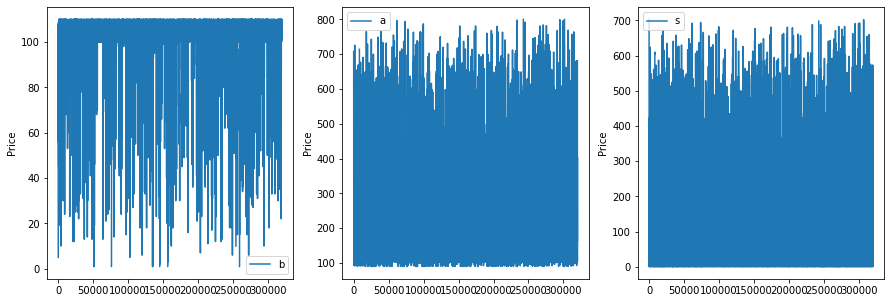

In [62]:
g = ['b','a','s']
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    ax[i].plot(lob[g[i]], label=g[i])
    ax[i].legend(loc='best')
    ax[i].set_ylabel('Price')

Let's graph a random sample of some 1000 seconds...

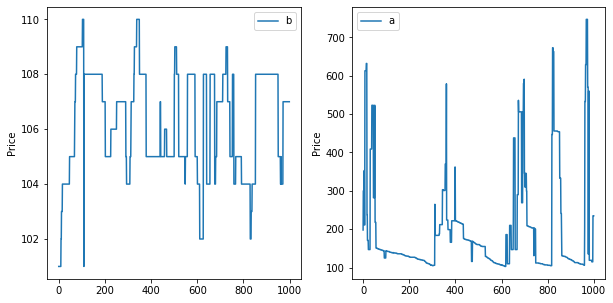

In [63]:
g = ['b','a']
fig, ax = plt.subplots(1,2, figsize=(10,5))
for i in range(2):
    ax[i].plot(np.arange(0,1000), lob[g[i]][150000:151000], label=g[i])
    ax[i].legend(loc='best')
    ax[i].set_ylabel('Price')

It looks from the summary data and graphs that the bid price is relatively stable around 100-110. However, there are big spikes in the ask price on this day. Let's have a look at these liquidity crises on the buy side.

In [64]:
lob.iloc[lob.a.argmax()-0:lob.a.argmax()+20,:]

,Timestamps,Bids,Asks,b,a,s
242675,23249.938,"[[102, 6], [100, 18], [81, 11], [79, 2]]","[[800, 2]]",102.0,800.0,698.0
242676,23250.031,"[[102, 6], [100, 18], [81, 11], [79, 2]]","[[799, 2], [800, 2]]",102.0,799.0,697.0
242677,23250.248,"[[102, 6], [100, 18], [81, 4], [79, 2]]","[[799, 2], [800, 2]]",102.0,799.0,697.0
242678,23250.310,"[[103, 1], [102, 6], [100, 18], [81, 4], [79, 2]]","[[799, 2], [800, 2]]",103.0,799.0,696.0
242679,23250.341,"[[103, 1], [102, 6], [100, 17], [81, 4], [79, ...","[[799, 2], [800, 2]]",103.0,799.0,696.0
242680,23250.403,"[[103, 1], [102, 6], [100, 17], [81, 4], [79, ...","[[416, 4], [799, 2], [800, 2]]",103.0,416.0,313.0
242681,23250.465,"[[103, 1], [102, 6], [100, 17], [81, 4], [79, ...","[[416, 4], [799, 2], [800, 2]]",103.0,416.0,313.0
242682,23250.620,"[[105, 3], [103, 1], [102, 6], [100, 17], [81,...","[[416, 4], [799, 2], [800, 2]]",105.0,416.0,311.0
242683,23250.651,"[[103, 1], [102, 6], [100, 17], [81, 4], [79, ...","[[416, 4], [799, 2], [800, 2]]",103.0,416.0,313.0
242684,23250.713,"[[103, 1], [102, 6], [100, 17], [81, 4], [79, ...","[[416, 4], [799, 2], [800, 2]]",103.0,416.0,313.0


Let's graph this...

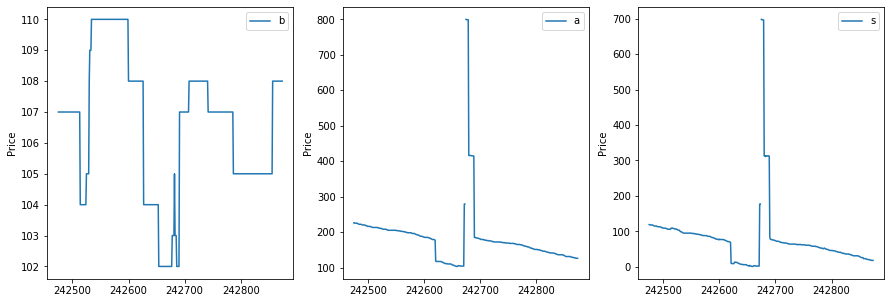

In [65]:
g = ['b','a','s']
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    ax[i].plot(lob[g[i]][lob.a.argmax()-200:lob.a.argmax()+200], label=g[i])
    ax[i].legend(loc='best')
    ax[i].set_ylabel('Price')

It looks like the price is stable for a time and then something triggers a liquidity crisis and massive volatility in the ask price. The ask price spikes for a period and peaks, before rapidly dropping back down. Let's create some new features, including the midprice and midprice volatility to see if this is mean-reverting as it appears or whether it is trending and over what periods.

In [66]:
lob['m'] = lob['b'] + ((lob['a'] - lob['b']) / 2)

In [67]:
lob[['b','a','s','m']].describe()

,b,a,s,m
count,320039.000000,320025.000000,319966.000000,319966.000000
mean,103.685313,164.282831,60.604211,133.987685
std,8.538956,92.175185,91.799919,46.664412
min,1.000000,90.000000,1.000000,45.500000
25%,103.000000,110.000000,6.000000,108.000000
50%,105.000000,129.000000,25.000000,117.500000
75%,108.000000,175.000000,70.000000,140.000000
max,110.000000,800.000000,703.000000,454.000000


Let's start by looking at extremely short term volatility with a rolling period of 30s.

In [68]:
td = pd.to_timedelta(lob['Timestamps'],'s')
lob = lob.set_index(td)
lob['std30s'] = lob['m'].rolling('30s').std()

In [69]:
# just checking that the above calculation worked correctly
np.where((lob.index > pd.to_timedelta(30, 's')))
lob.iloc[253:556,:]
lob['m'][:255].std()

44.482218080830364

We'll add the 30s corresponding forward-looking return to see it's effect on future price changes. We'll also add the forward 10s mid-price change

In [70]:
lob_r = lob[::-1]
def diff_ret(x):
    return (x.iloc[0] - x.iloc[-1]) / x.iloc[-1]

def diff(x):
    return (x.iloc[0] - x.iloc[-1])

lob_r['fwd30sret'] = lob_r['m'].rolling('30s').apply(diff_ret)
lob_r['fwd_delta_m_10s'] = lob_r['m'].rolling('10s').apply(diff)

C:\Users\Morg\AppData\Local\Temp\ipykernel_21728\1066748171.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lob_r['fwd30sret'] = lob_r['m'].rolling('30s').apply(diff_ret)
C:\Users\Morg\AppData\Local\Temp\ipykernel_21728\1066748171.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lob_r['fwd_delta_m_10s'] = lob_r['m'].rolling('10s').apply(diff)


In [71]:
#lob = lob.drop(columns=['fwd30sret'])

In [72]:
lob = lob.join(lob_r['fwd_delta_m_10s'])

In [73]:
lob = lob.join(lob_r['fwd30sret'])

Let's see if there is any relationship between increased volatility and future returns...

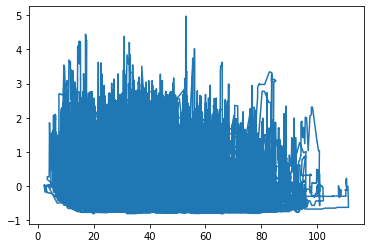

In [74]:
plt.plot(lob['std30s'],lob['fwd30sret'])

There is no relationship. Let's see if there is a relationship between mid-price and future 30 second returns.

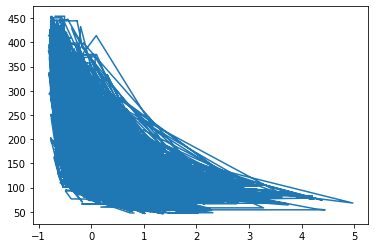

In [75]:
plt.plot(lob['fwd30sret'], lob['m'])

We can see there is a power law relationship, showing that when prices are very high, the return is much more likely to be negative. When prices are low, there is much more potential for outsized returns.

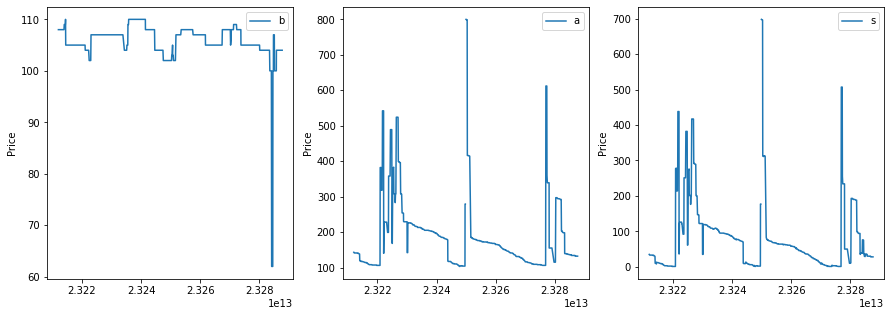

In [76]:
g = ['b','a','s']
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    ax[i].plot(lob[g[i]][lob.a.argmax()-400:lob.a.argmax()+400], label=g[i])
    ax[i].legend(loc='best')
    ax[i].set_ylabel('Price')

In [77]:
lob[(lob['Timestamps'] > 3480) & (lob['Timestamps'] < 3505)]

,Timestamps,Bids,Asks,b,a,s,m,std30s,fwd_delta_m_10s,fwd30sret
Timestamps,,,,,,,,,,
0 days 00:58:00.153000,3480.153,"[[102, 4], [101, 5], [100, 9], [98, 5], [89, 2...","[[105, 2], [269, 1], [443, 3]]",102.0,105.0,3.0,103.5,28.471255,41.0,1.217391
0 days 00:58:00.215000,3480.215,"[[102, 4], [101, 5], [100, 4], [98, 5], [89, 2...","[[105, 2], [269, 1], [443, 3]]",102.0,105.0,3.0,103.5,28.392797,41.0,1.217391
0 days 00:58:00.277000,3480.277,"[[102, 4], [101, 5], [100, 4], [98, 5], [89, 2...","[[105, 2], [269, 1], [443, 3]]",102.0,105.0,3.0,103.5,28.296518,41.0,1.217391
0 days 00:58:00.308000,3480.308,"[[102, 4], [101, 5], [100, 4], [98, 5], [89, 2...","[[105, 2], [269, 1], [443, 3]]",102.0,105.0,3.0,103.5,28.217024,41.0,1.217391
0 days 00:58:00.370000,3480.370,"[[102, 4], [101, 5], [100, 4], [98, 5], [89, 2...","[[105, 2], [269, 1], [725, 3]]",102.0,105.0,3.0,103.5,28.180212,41.0,1.217391
0 days 00:58:00.401000,3480.401,"[[102, 4], [101, 5], [100, 4], [98, 5], [89, 2...","[[105, 2], [269, 1], [725, 3]]",102.0,105.0,3.0,103.5,28.143523,41.0,1.217391
0 days 00:58:00.463000,3480.463,"[[102, 4], [101, 5], [100, 4], [98, 5], [66, 3...","[[105, 2], [269, 1], [725, 3]]",102.0,105.0,3.0,103.5,28.066550,40.5,2.270531
0 days 00:58:00.494000,3480.494,"[[102, 4], [101, 5], [100, 4], [98, 5], [66, 3...","[[104, 2], [269, 1], [725, 3]]",102.0,104.0,2.0,103.0,27.990012,41.0,2.334951
0 days 00:58:00.587000,3480.587,"[[102, 4], [101, 5], [100, 4], [98, 5], [66, 3...","[[104, 2], [269, 1], [725, 3]]",102.0,104.0,2.0,103.0,27.915383,41.0,2.334951


## Order Flow Imbalance EDA

First, let's extract the OFI feature. The calculations and time periods used below exactly mirror the experiments conducted by Cont et al. (2014), when comparing the Order Flow Imbalance (OFI) to the trade imbalance feature. We will conduct a similar OLS regression and see if we get similar predictive power from the OFI.

Let's start by creating a feature for the backwards-10s OFI (as in Cont et al. (2014)). We need to first add features for the volumes at the bid and ask prices.

In [78]:
lob

,Timestamps,Bids,Asks,b,a,s,m,std30s,fwd_delta_m_10s,fwd30sret
Timestamps,,,,,,,,,,
0 days 00:00:00,0.000,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:01.922000,1.922,[],"[[708, 4]]",NaN,708.0,NaN,NaN,NaN,NaN,NaN
0 days 00:00:02.790000,2.790,"[[5, 1]]","[[708, 4]]",5.0,708.0,703.0,356.5,NaN,-250.0,-0.718093
0 days 00:00:03.255000,3.255,"[[59, 1]]","[[708, 4]]",59.0,708.0,649.0,383.5,19.091883,-277.0,-0.765319
0 days 00:00:03.379000,3.379,"[[59, 1]]","[[596, 4]]",59.0,596.0,537.0,327.5,28.005952,-221.0,-0.725191
...,...,...,...,...,...,...,...,...,...,...
0 days 08:29:59.728000,30599.728,"[[105, 9], [104, 8], [101, 1], [100, 5], [89, ...","[[166, 5], [167, 1], [169, 5], [329, 2], [419,...",105.0,166.0,61.0,135.5,55.751183,-0.5,-0.003690
0 days 08:29:59.759000,30599.759,"[[105, 9], [104, 8], [101, 1], [100, 5], [89, ...","[[166, 5], [167, 1], [169, 5], [419, 3], [466,...",105.0,166.0,61.0,135.5,55.573836,-0.5,-0.003690
0 days 08:29:59.821000,30599.821,"[[105, 9], [104, 8], [101, 1], [100, 5], [79, ...","[[166, 5], [167, 1], [169, 5], [419, 3], [466,...",105.0,166.0,61.0,135.5,55.513932,-0.5,-0.003690


In [79]:
def vol_ba(x):
    try:
        return x[0][1]
    except:
        return 0
    
lob['vol_b'] = lob.Bids.apply(vol_ba)
lob['vol_a'] = lob.Asks.apply(vol_ba)

# re-order columns for cleanliness
# lob = lob[['Timestamps', 'Bids', 'Asks', 'b','vol_b', 'a','vol_a', 's', 'm', 'std30s', 'fwd30sret']]

In [80]:
lob_s = lob.iloc[100:1000,:]

Next, let's calculate the change in order flow dW on the buy side and order flow dV on the sell side at each change in the limit order book. This includes cancellations, market orders and new limit orders that affect the highest bid and lowest ask prices. We'll then use this to calculate the net order flow, e, and the 10-second order flow imbalance.

In [83]:
def dW(x, df):
    if df.b[x.index.start] == df.b[x.index.stop-1]:
        return x.iloc[-1] - x.iloc[0]
    if df.b[x.index.stop-1] > df.b[x.index.start]:
        return x.iloc[-1]
    if df.b[x.index.stop-1] < df.b[x.index.start]:
        return -x.iloc[0]
    else:
        return np.NaN

def dV(x, df):
    if df.a[x.index.start] == df.a[x.index.stop-1]:
        return x.iloc[-1] - x.iloc[0]
    if df.a[x.index.stop-1] > df.a[x.index.start]:
        return -x.iloc[0]
    if df.a[x.index.stop-1] < df.a[x.index.start]:
        return x.iloc[-1]
    else:
        return np.NaN

In [84]:
lob = lob.reset_index(drop=True)
lob['dW'] = lob.vol_b.rolling(window=2).apply(lambda x: dW(x, lob))
lob['dV'] = lob.vol_a.rolling(window=2).apply(lambda x: dV(x, lob))
lob['e'] = lob['dW'] - lob['dV']
td = pd.to_timedelta(lob['Timestamps'],'s')
lob = lob.set_index(td)
lob['OFI10s'] = lob['e'].rolling('10s').sum()

We'll now calculate the rolling 10 second mid-price change as a measure for the respective price change.

In [85]:
def diff(x):
    return x.iloc[-1] - x.iloc[0]

lob['delta_m_10s'] = lob.m.rolling('10s').apply(diff)

In [86]:
def mid_pos_delta(x):
    if x > 0:
        return 1
    if x <= 0:
        return 0

lob['delta_m_10s_pos'] = lob.delta_m_10s.apply(lambda x: mid_pos_delta(x))
lob['fwd_delta_m_10s_pos'] = lob.fwd_delta_m_10s.apply(lambda x: mid_pos_delta(x))

We are now ready to conduct the experiment. First, we resample the data to 10s intervals. Next, we split the data into 30m chunks, consisting of 180 10s intervals. We then run a linear regression model on each 30m chunk, using the 10s order flow imbalance in non-overlapping intervals as an explanatory variable and the respective 10s mid-price change.

In [87]:
lob_10 = lob.iloc[100:,:].resample('10s').first()

In [88]:
lobs30 = []
start = pd.to_timedelta('00:00:00')
stop = pd.to_timedelta('00:30:00')
for i in range(17):
    lobs30.append(lob_10.loc[start:stop,:])
    start += '30m'
    stop += '30m'

In [89]:
import statsmodels.api as sm

weights = []
for i in range(17):
    X = lobs30[i]['OFI10s'].to_numpy().reshape(-1, 1)
    y = lobs30[i]['delta_m_10s'].to_numpy().reshape(-1, 1)
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est = est.fit()
    weights.append(est.pvalues[1])
    
for w in weights:
    if w < 0.05:
        print('p-value:', w, 'SIGNIFICANT')
    else:
        print('p-value:', w)

p-value: 6.2018722883159045e-06 SIGNIFICANT
p-value: 0.26591468339000823
p-value: 0.015401697159849464 SIGNIFICANT
p-value: 0.0008997104816254312 SIGNIFICANT
p-value: 4.2657192828636934e-07 SIGNIFICANT
p-value: 0.0021218964265418425 SIGNIFICANT
p-value: 1.9078784041784963e-05 SIGNIFICANT
p-value: 9.484992400273901e-05 SIGNIFICANT
p-value: 0.0002406017270500308 SIGNIFICANT
p-value: 0.0031889745850869843 SIGNIFICANT
p-value: 2.4590493291255852e-05 SIGNIFICANT
p-value: 6.579806207433696e-05 SIGNIFICANT
p-value: 7.449314801949529e-07 SIGNIFICANT
p-value: 0.004643735350275768 SIGNIFICANT
p-value: 2.1976133017011975e-07 SIGNIFICANT
p-value: 0.10882796375641007
p-value: 0.0024098182274828934 SIGNIFICANT


Text(0.5, 0, '10-second Order Flow Imbalance')

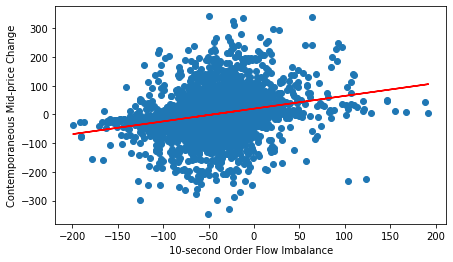

In [104]:
from sklearn.linear_model import LinearRegression

X = lob_10['OFI10s'].to_numpy().reshape(-1,1)
y = lob_10['delta_m_10s'].to_numpy().reshape(-1,1)
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)
pred = lr.predict(X)

fig, ax = plt.subplots(1,1, figsize=(7, 4))
ax.plot(X,pred, color='r')
ax.scatter(X,y)
ax.set_ylabel('Contemporaneous Mid-price Change')
ax.set_xlabel('10-second Order Flow Imbalance')

We can see that order flow imbalance is a statistically significant predictor of contemporaneous changes in mid-price for 10s intervals. Let's see if we can improve our predictions by using a classifier to predict whether the price will go up or down, rather than the exact price change.

In [91]:
from sklearn.model_selection import train_test_split

X = lob_10['OFI10s'].to_numpy().reshape(-1,1)
y = lob_10['delta_m_10s_pos'].to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
ypred_test=knn.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred_test)
cm

C:\Users\Morg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[230, 118],
       [131, 133]], dtype=int64)

In [92]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print('Accuracy:', accuracy_score(y_test, ypred_test),'\nRecall:', recall_score(y_test, ypred_test, average='macro'),'\nPrecision:',precision_score(y_test, ypred_test, average='macro'))

Accuracy: 0.5931372549019608 
Recall: 0.582353709508882 
Precision: 0.5834997958305284


## Volume-related Features EDA

It can be seen that occassions where there are large jumps in the mid-price are characterised by low volumes on the sell-side of the book. One measure of volumes is the Order Book Imbalance. This is calculated as the volume of orders at the best bid price minus the volume of orders at the best ask, divided by the sum of the two.

Let's calculate the OBI at each transaction and the all-volume difference at each timestamp.

In [93]:
def count_vol(x):
    count = 0
    for entry in x:
        count += entry[1]
    return count

In [94]:
lob['all_vol_b'] = lob.Bids.apply(lambda x: count_vol(x))
lob['all_vol_a'] = lob.Asks.apply(lambda x: count_vol(x))
lob['all_vol_diff'] = lob['all_vol_b'] - lob['all_vol_a']

In [95]:
lob['OBI'] = (lob['vol_b'] - lob['vol_a']) / (lob['vol_b'] + lob['vol_a'])

Let's first replicate Conte et al.'s experiment but for intervals of 60m to increase training data. We also use a logistic regression, as the target variable is an indicator.

In [96]:
lob_10 = lob.iloc[100:,:].resample('10s').first()

lobs60 = []
start = pd.to_timedelta('00:00:00')
stop = pd.to_timedelta('00:60:00')
for i in range(8):
    lobs60.append(lob_10.loc[start:stop,:])
    start += '60m'
    stop += '60m'

In [97]:
import statsmodels.api as sm

weights = []
for i in range(8):
    X = lobs60[i][['OFI10s', 'OBI', 'all_vol_diff', 's']].to_numpy()
    y = lobs60[i]['fwd_delta_m_10s_pos'].to_numpy().reshape(-1, 1)
    sm_model = sm.Logit(y, sm.add_constant(X)).fit(disp=0)
    print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  359
Model:                          Logit   Df Residuals:                      354
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.2631
Time:                        10:19:23   Log-Likelihood:                -181.28
converged:                       True   LL-Null:                       -246.01
Covariance Type:            nonrobust   LLR p-value:                 5.061e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0028      0.282      3.553      0.000       0.450       1.556
x1            -0.0017      0.003     -0.538      0.591      -0.008       0.004
x2            -0.0742      0.312     -0.238      0.8

Now, let's train it on 80% of a day's data and test it on 20% of a day in 10s non-overlapping interval data still. The model gets approx. 80% score on the test set but most/all of the explanatory power comes from the spread. This is due to the susceptability of the mid-price to droughts of liquidity on the sell side.

In [105]:
from sklearn.linear_model import LogisticRegression

X = lob_10[['OFI10s', 'OBI', 'all_vol_diff']].to_numpy()
y = lob_10['fwd_delta_m_10s_pos'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Score on the test set (% correct predictions):',lr.score(X_test, y_test))

Score on the test set (% correct predictions): 0.6143790849673203


C:\Users\Morg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
sm_model = sm.Logit(y, sm.add_constant(X)).fit(disp=0)
print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3059
Model:                          Logit   Df Residuals:                     3055
Method:                           MLE   Df Model:                            3
Date:                Sun, 07 May 2023   Pseudo R-squ.:                 0.03225
Time:                        11:06:57   Log-Likelihood:                -2028.7
converged:                       True   LL-Null:                       -2096.3
Covariance Type:            nonrobust   LLR p-value:                 4.035e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4532      0.076     -5.942      0.000      -0.603      -0.304
x1            -0.0086      0.001     -9.235      0.000      -0.010      -0.007
x2             0.4824      0.091      5.327      0.0

Let's now try it again with a K-nearest neighbours classifier. With n=3, the model yields strong metrics. However, again most of the predictive power comes from the spread for the same reasons as above.

In [100]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

X = lob_10[['OFI10s', 'OBI', 'all_vol_diff', 's']].to_numpy()
y = lob_10['fwd_delta_m_10s_pos'].to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
ypred_test=knn.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred_test)
print(cm)

print('Accuracy:', accuracy_score(y_test, ypred_test),'\nRecall:', recall_score(y_test, ypred_test, average='macro'),'\nPrecision:',precision_score(y_test, ypred_test, average='macro'))

C:\Users\Morg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[271  56]
 [ 76 209]]
Accuracy: 0.7843137254901961 
Recall: 0.7810397553516819 
Precision: 0.7848295361861781


## Target Variable

Up to this point, we have been using changes in mid-price as a target variable for price increases. However, this makes the assumption that either trades can be carried out at the mid-price or limit orders placed at the best bid and ask for a given mid-price will be closed before the end of the day. According to a 2022 survey (https://www.mdpi.com/2227-7390/10/8/1234) on stock price prediction using LOB data, this is a limiting assumption to the practical use of price prediction models in the real world and the results of most previous studies have accepted this assumption as a constraint to their experiments (limiting their real-world applicability). Furthermore, in an illiquid market as this dataset indicates, the current spread has outsized explanatory power for future mid-price movements.

To test the validity of this assumption, we need to look at the tape data to see if limit orders placed in such a way (at the best bid and best ask) when the sell-side liquidity is low are actually closed before the eod.

In [113]:
tape = pd.read_csv('./data/cleaned_tape_data_2024-06-26.csv', index_col=0)
tape['Price'].describe()

count    27904.000000
mean       104.356508
std          3.605723
min         90.000000
25%        102.000000
50%        105.000000
75%        107.000000
max        110.000000
Name: Price, dtype: float64

In [114]:
lob[['b', 'a', 'm']].describe()

,b,a,m
count,320039.000000,320025.000000,319966.000000
mean,103.685313,164.282831,133.987685
std,8.538956,92.175185,46.664412
min,1.000000,90.000000,45.500000
25%,103.000000,110.000000,108.000000
50%,105.000000,129.000000,117.500000
75%,108.000000,175.000000,140.000000
max,110.000000,800.000000,454.000000


We can see that when the best ask price rises, asks placed at this dramatically higher level will never be fulfilled by the market. Our dataset features much lower liquidity than the benchmark LOB dataset used in most popular studies, meaning that we are less able to accept this limiting assumption. As a result, we can conclude that the mid-price is an insufficient target variable for future experiments.

We have the tape data so let's see if we can join that to our LOB data and use that as a target variable...

First we clean up the tape data and get rid of duplicate timestamps so that we only keep information for the lowest price paid at any given timestamp. This accounts for occassions where a trader walks the book and indicates the last price that was paid for the asset.

In [115]:
td = pd.to_timedelta(tape.index,'s')
tape = tape.set_index(td)
tape = tape.sort_values(by = ['Timestamp', 'Price'], ascending = [True, True])
tape = tape[~tape.index.duplicated(keep='first')]
tape['ts'] = tape.index

In [116]:
lob = pd.merge_asof(lob, tape, left_index=True, right_index=True, direction='backward')

Now we just need to shift the new columns backwards one interval...

In [117]:
shifted = lob[['Price', 'Quantity', 'ts']].shift(-1).ffill()
lob = lob.drop(columns=['Price', 'Quantity', 'ts'])
lob = lob.join(shifted)

Now we have the true price that the asset was last traded at, we can generate some new target variables, which might help us make price predictions. For comparatability to studies on the LOB benchmark dataset, we will classify price changes using three categories:
 - 0: Price goes down
 - 1: Price remains flat
 - 2: Price goes up
Across five different time intervals. We will first investigate using 10s, 20s, 30s, 45s, and 1m intervals.

For cleanliness, let's first remove some of the mid-price target variables. We will then add the execution price changes for above intervals. We will start with a basic 0=down, 1=up classification, and then progress to the above.

In [118]:
lob_1 = lob  # store the last LOB data features in lob_1
lob = lob.drop(columns=['fwd_delta_m_10s', 'fwd30sret', 'delta_m_10s', 'delta_m_10s_pos', 'fwd_delta_m_10s_pos'])
lob = lob.rename(columns={'Price':'Execution Price', 'Quantity':'Execution Quantity', 'ts':'Execution Timestamp'})

In [119]:
lob_r = lob[::-1]

def diff(x):
    return (x.iloc[0] - x.iloc[-1])

lob_r['fwd_10s_delta'] = lob_r['Execution Price'].rolling('10s').apply(diff)
lob_r['fwd_20s_delta'] = lob_r['Execution Price'].rolling('20s').apply(diff)
lob_r['fwd_30s_delta'] = lob_r['Execution Price'].rolling('30s').apply(diff)
lob_r['fwd_45s_delta'] = lob_r['Execution Price'].rolling('45s').apply(diff)
lob_r['fwd_60s_delta'] = lob_r['Execution Price'].rolling('60s').apply(diff)
lob = lob.join(lob_r[['fwd_10s_delta', 'fwd_20s_delta', 'fwd_30s_delta', 'fwd_45s_delta', 'fwd_60s_delta']])

C:\Users\Morg\AppData\Local\Temp\ipykernel_21728\4162162889.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lob_r['fwd_10s_delta'] = lob_r['Execution Price'].rolling('10s').apply(diff)
C:\Users\Morg\AppData\Local\Temp\ipykernel_21728\4162162889.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lob_r['fwd_20s_delta'] = lob_r['Execution Price'].rolling('20s').apply(diff)
C:\Users\Morg\AppData\Local\Temp\ipykernel_21728\4162162889.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

<AxesSubplot: >

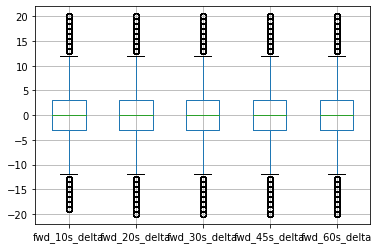

In [120]:
lob[['fwd_10s_delta', 'fwd_20s_delta',
       'fwd_30s_delta', 'fwd_45s_delta', 'fwd_60s_delta']].boxplot()

In [121]:
def delta_pos(x):
    if x > 0:
        return 1
    if x <= 0:
        return 0
    
lob['fwd_10s_delta_pos'] = lob.fwd_10s_delta.apply(lambda x: mid_pos_delta(x))
lob['fwd_20s_delta_pos'] = lob.fwd_20s_delta.apply(lambda x: mid_pos_delta(x))
lob['fwd_30s_delta_pos'] = lob.fwd_30s_delta.apply(lambda x: mid_pos_delta(x))
lob['fwd_45s_delta_pos'] = lob.fwd_45s_delta.apply(lambda x: mid_pos_delta(x))
lob['fwd_60s_delta_pos'] = lob.fwd_60s_delta.apply(lambda x: mid_pos_delta(x))

In [ ]:
lob_10 = lob.iloc[100:,:].resample('10s').first()

In [145]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

X = lob[['OFI10s', 'OBI', 'all_vol_diff']].to_numpy()
y = lob['fwd_10s_delta_pos'].to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
ypred_test=knn.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred_test)
print(cm)

print('Accuracy:', accuracy_score(y_test, ypred_test),'\nRecall:', recall_score(y_test, ypred_test, average='macro'),'\nPrecision:',precision_score(y_test, ypred_test, average='macro'))

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [125]:
lob.head(200)

,Timestamps,Bids,Asks,b,a,s,m,std30s,vol_b,vol_a,...,fwd_10s_delta,fwd_20s_delta,fwd_30s_delta,fwd_45s_delta,fwd_60s_delta,fwd_10s_delta_pos,fwd_20s_delta_pos,fwd_30s_delta_pos,fwd_45s_delta_pos,fwd_60s_delta_pos
Timestamps,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0.000,[],[],NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:01.922000,1.922,[],"[[708, 4]]",NaN,708.0,NaN,NaN,NaN,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:02.790000,2.790,"[[5, 1]]","[[708, 4]]",5.0,708.0,703.0,356.5,NaN,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:03.255000,3.255,"[[59, 1]]","[[708, 4]]",59.0,708.0,649.0,383.5,19.091883,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:03.379000,3.379,"[[59, 1]]","[[596, 4]]",59.0,596.0,537.0,327.5,28.005952,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:03.441000,3.441,"[[108, 1], [59, 1]]","[[596, 4]]",108.0,596.0,488.0,352.0,22.946950,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:04.495000,4.495,"[[108, 1], [87, 2], [59, 1]]","[[596, 4]]",108.0,596.0,488.0,352.0,19.914191,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:04.619000,4.619,"[[108, 1], [95, 1], [87, 2]]","[[596, 4]]",108.0,596.0,488.0,352.0,17.836526,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:04.805000,4.805,"[[108, 1], [95, 1], [87, 2]]","[[531, 4]]",108.0,531.0,423.0,319.5,20.840665,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
from sklearn.linear_model import LogisticRegression

X = lob.iloc[100:,:][lob.iloc[100:,:]['s'].notnull()][['OFI10s', 'OBI', 'all_vol_diff']].to_numpy()
y = lob.iloc[100:,:][lob.iloc[100:,:]['s'].notnull()]['fwd_10s_delta_pos'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Score on the test set (% correct predictions):',lr.score(X_test, y_test))

C:\Users\Morg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score on the test set (% correct predictions): 0.6269890893175353


In [139]:
sm_model = sm.Logit(y, sm.add_constant(X)).fit(disp=0)
print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               319868
Model:                          Logit   Df Residuals:                   319863
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 May 2023   Pseudo R-squ.:                 0.04459
Time:                        12:21:43   Log-Likelihood:            -2.0597e+05
converged:                       True   LL-Null:                   -2.1558e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2286      0.008     28.037      0.000       0.213       0.245
x1             0.0032   9.01e-05     35.623      0.000       0.003       0.003
x2             0.4869      0.009     53.456      0.0

In [147]:
lob.to_csv('./data/LOB_merged_tape_data.csv')

KeyboardInterrupt: 

In [148]:
lob

,Timestamps,Bids,Asks,b,a,s,m,std30s,vol_b,vol_a,...,fwd_10s_delta,fwd_20s_delta,fwd_30s_delta,fwd_45s_delta,fwd_60s_delta,fwd_10s_delta_pos,fwd_20s_delta_pos,fwd_30s_delta_pos,fwd_45s_delta_pos,fwd_60s_delta_pos
Timestamps,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0.000,[],[],NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:01.922000,1.922,[],"[[708, 4]]",NaN,708.0,NaN,NaN,NaN,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:02.790000,2.790,"[[5, 1]]","[[708, 4]]",5.0,708.0,703.0,356.5,NaN,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:03.255000,3.255,"[[59, 1]]","[[708, 4]]",59.0,708.0,649.0,383.5,19.091883,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:03.379000,3.379,"[[59, 1]]","[[596, 4]]",59.0,596.0,537.0,327.5,28.005952,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 08:29:59.728000,30599.728,"[[105, 9], [104, 8], [101, 1], [100, 5], [89, ...","[[166, 5], [167, 1], [169, 5], [329, 2], [419,...",105.0,166.0,61.0,135.5,55.751183,9,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 08:29:59.759000,30599.759,"[[105, 9], [104, 8], [101, 1], [100, 5], [89, ...","[[166, 5], [167, 1], [169, 5], [419, 3], [466,...",105.0,166.0,61.0,135.5,55.573836,9,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 08:29:59.821000,30599.821,"[[105, 9], [104, 8], [101, 1], [100, 5], [79, ...","[[166, 5], [167, 1], [169, 5], [419, 3], [466,...",105.0,166.0,61.0,135.5,55.513932,9,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Adding Transaction Type (may or may not need this code in the future)

In [ ]:
def changed(x, df):  # This function determines whether the execution price has changed from t to t+1
    if x[-1] != x[0]:
        return 1
    else:
        return 0
    
lob['changed'] = lob['Execution Price'].rolling(2).apply(lambda x: changed(x, lob))

def get_order_type(x, df):  # This function determines whether the execution price was less than or equal to the bid (a sell MO) or greater than or equal to the best ask (a buy MO)
    if x.iloc[0] == 1:
        if df['Execution Price'][x.index[0]] <= df.b[x.index[0]]:
            return 0
        elif df['Execution Price'][x.index[0]] >= df.a[x.index[0]]:
            return 1
        else:
            return np.NaN
    else:
        return np.NaN

lob['Execution Type'] = lob.changed.rolling(1).apply(lambda x: get_order_type(x, lob))
lob['Execution Type'] = lob['Execution Type'].ffill()  # Fills the result forward so that each timestamp displays the execution type for the most recent market order

def buy_or_sell(x):  # changes indicator to 'B' or 'S'
    if x == 1:
        return 'B'
    if x == 0:
        return 'S'
    else:
        return np.NaN
    
lob['Execution Type'] = lob['Execution Type'].apply(buy_or_sell)
lob = lob[['Timestamps', 'Bids', 'Asks', 'b', 'a', 's', 'm', 'std30s', 'vol_b',
       'vol_a', 'OFI10s', 'all_vol_b', 'all_vol_a', 'all_vol_diff', 'OBI',
       'Execution Price', 'Execution Type', 'Execution Quantity', 'Execution Timestamp',
       'fwd_10s_delta', 'fwd_20s_delta', 'fwd_30s_delta', 'fwd_45s_delta',
       'fwd_60s_delta']] # reorder the columns

## Extracting Trading Signals

We now have a much better target variable that reflects price changes in the true price of the asset (the last price it transacted at). However, if this is used for prediction and generating trade signals, we may still suffer from liquidity problems and end up losing a proportion of the spread of the asset at any given interval (even if the price is predicted to increase or decrease).

Therefore, in order to trigger a buy (or sell) signal, the true price must increase (or decrease) and the best ask price (or bid price) must be lower (or higher) than the future price, in order for the trader to 'beat the spread' and make a profit from said trade.

In order to indicate to our models when this is the case, we will create a target variable which classifies a buy (2), neutral (1), or sell (0) signal at any given timestamp based on the relative sizes of the current best bid (or ask) price and the transaction price and type of the last market order that has taken place after a defined interval (10s, 20s, 30s, 45s or 60s).

This way, a model will be predicting whether the price is due to increase (or decrease) and there is sufficient liquidity in the market to take advantage of such an increase (or decrease) so as to make a profit.

Let's start off with the LOB dataframe we were working with above and just do some cleaning, including removing the previous target variables, adding time-deltas to the index, and converting the bids and asks to arrays...

In [149]:
lob2 = pd.read_csv('./data/LOB_merged_tape_data.csv')

In [150]:
td = pd.to_timedelta(lob2['Timestamps.1'],'s')
lob2 = lob2.set_index(td)
lob2 = lob2.drop(columns=['Timestamps', 'dW', 'dV', 'e', 'fwd_10s_delta_pos', 'fwd_20s_delta_pos', 'fwd_30s_delta_pos',
       'fwd_45s_delta_pos', 'fwd_60s_delta_pos' ])
lob2 = lob2.rename(columns={'Timestamps.1':'Timestamps'})

lob = pd.read_csv(f'cleaned_lob_data_{name}.csv')
lob.Bids = lob.Bids.apply(lambda x: ast.literal_eval(str(x)))
lob.Asks = lob.Asks.apply(lambda x: ast.literal_eval(str(x)))
lob.Timestamps = lob.Timestamps.apply(lambda x: float(x))
lob.Bids = lob.Bids.apply(lambda x: np.array(x))
lob.Asks = lob.Asks.apply(lambda x: np.array(x))
lob = lob.set_index(td)

columns = lob2.columns
lob2 = lob2.drop(columns=['Bids', 'Asks'])
lob2['Bids'], lob2['Asks'] = lob['Bids'], lob['Asks']
lob = lob2[columns]

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_lob_data_2024-06-26.csv'

The following code adds a feature for each of 6 intervals (5s, 10s, 20s, 30s, 45s, 60s), determines whether the bid price (respectively ask price) is higher (lower) in said interval than the current ask price (bid price) with a margin of safety of 2. This will act as our trading signal indicator: 0 (sell), 1 (neutral), 2 (buy).

In [151]:
def get_signal(x, df):
    if df.b[x.index[0]] >= df.a[x.index[-1]] + 2:  # margin of safety = 2 here
        return 2
    if df.a[x.index[0]] <= df.b[x.index[-1]] - 2:  # margin of safety = 2 here also
        return 0
    else:
        return 1

lob_r = lob[::-1]
    
lob_r['signal_5s'] = lob_r['Execution Price'].rolling('5s', min_periods=15).apply(lambda x: get_signal(x, lob_r))
lob_r['signal_10s'] = lob_r['Execution Price'].rolling('10s', min_periods=30).apply(lambda x: get_signal(x, lob_r))
lob_r['signal_20s'] = lob_r['Execution Price'].rolling('20s', min_periods=60).apply(lambda x: get_signal(x, lob_r))
lob_r['signal_30s'] = lob_r['Execution Price'].rolling('30s', min_periods=90).apply(lambda x: get_signal(x, lob_r))
lob_r['signal_45s'] = lob_r['Execution Price'].rolling('45s', min_periods=150).apply(lambda x: get_signal(x, lob_r))
lob_r['signal_60s'] = lob_r['Execution Price'].rolling('60s', min_periods=180).apply(lambda x: get_signal(x, lob_r))

lob = lob.join(lob_r[['signal_5s','signal_10s','signal_20s','signal_30s','signal_45s','signal_60s']])

C:\Users\Morg\AppData\Local\Temp\ipykernel_21728\484700552.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lob_r['signal_5s'] = lob_r['Execution Price'].rolling('5s', min_periods=15).apply(lambda x: get_signal(x, lob_r))
C:\Users\Morg\AppData\Local\Temp\ipykernel_21728\484700552.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lob_r['signal_10s'] = lob_r['Execution Price'].rolling('10s', min_periods=30).apply(lambda x: get_signal(x, lob_r))
C:\Users\Morg\AppData\Local\Temp\ipykernel_21728\484700552

In a similar way to before, we will use logistic regression to test feature importance...

In [152]:
from sklearn.linear_model import LogisticRegression

X = lob.iloc[100:300000,:][lob['s'].notnull()][['OFI10s', 'OBI', 'all_vol_diff', 's']].to_numpy()
y = lob.iloc[100:300000,:][lob['s'].notnull()]['signal_10s'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train, y_train)
print('Score on the test set (% correct predictions):',lr.score(X_test, y_test))

C:\Users\Morg\AppData\Local\Temp\ipykernel_21728\3616401873.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = lob.iloc[100:300000,:][lob['s'].notnull()][['OFI10s', 'OBI', 'all_vol_diff', 's']].to_numpy()
C:\Users\Morg\AppData\Local\Temp\ipykernel_21728\3616401873.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = lob.iloc[100:300000,:][lob['s'].notnull()]['signal_10s'].to_numpy().reshape(-1, 1)
C:\Users\Morg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score on the test set (% correct predictions): 0.8321546518997899


C:\Users\Morg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
y_pred = lr.predict(X_test)
print('Number of sell signal predictions:', len(y_pred[y_pred==0]),'\nNumber of neutral predictions:',len(y_pred[y_pred==1]),'\nNumber of buy signal predictions:',len(y_pred[y_pred==2]))

Number of sell signal predictions: 0 
Number of neutral predictions: 58687 
Number of buy signal predictions: 1267


However, it makes no predictions for 0 and predicts 1 far more on average due to its probabilistic nature.

Let's try instead with a decision tree and random forest using the same input variables

In [372]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.metrics import precision_score, recall_score, accuracy_score

X = lob.iloc[100:300000,:][lob['s'].notnull()][['OFI10s', 'OBI', 'all_vol_diff', 's']].to_numpy()
y = lob.iloc[100:300000,:][lob['s'].notnull()]['signal_10s'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy_score(y_test, y_pred),'\nRecall:', recall_score(y_test, y_pred, average='macro'),'\nPrecision:',precision_score(y_test, y_pred, average='macro'))
cm

C:\Users\Morg\AppData\Local\Temp\ipykernel_4476\150631218.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = lob.iloc[100:300000,:][lob['s'].notnull()][['OFI10s', 'OBI', 'all_vol_diff', 's']].to_numpy()
C:\Users\Morg\AppData\Local\Temp\ipykernel_4476\150631218.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = lob.iloc[100:300000,:][lob['s'].notnull()]['signal_10s'].to_numpy().reshape(-1, 1)


Accuracy: 0.926343530039697 
Recall: 0.8495453291090951 
Precision: 0.8372929839067093


array([[ 4351,  1100,    89],
       [ 1457, 47174,   825],
       [   95,   850,  4013]], dtype=int64)

Feature: 0, Score: 0.32817
Feature: 1, Score: 0.19528
Feature: 2, Score: 0.24306
Feature: 3, Score: 0.23349


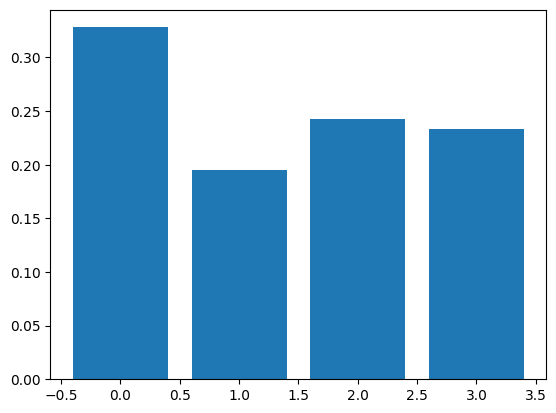

In [374]:
importance = model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

This actually performs very well and all our features are providing information to the model.

C:\Users\Morg\AppData\Local\Temp\ipykernel_4476\4081321589.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


Feature: 0, Score: 0.35717
Feature: 1, Score: 0.18781
Feature: 2, Score: 0.23438
Feature: 3, Score: 0.22064


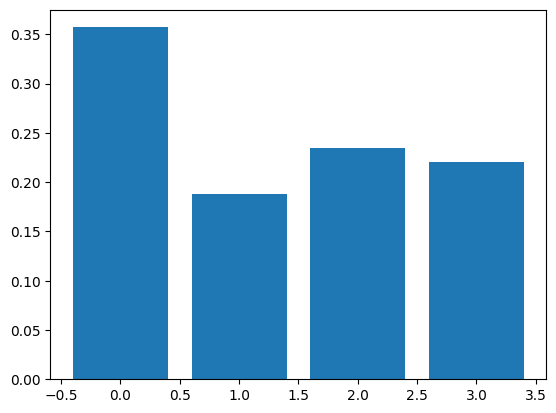

In [354]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [373]:
lob

,Timestamps,Bids,Asks,b,a,s,m,std30s,vol_b,vol_a,...,fwd_20s_delta,fwd_30s_delta,fwd_45s_delta,fwd_60s_delta,signal_10s,signal_20s,signal_30s,signal_45s,signal_60s,signal_5s
Timestamps.1,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0.000,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
0 days 00:00:01.922000,1.922,[],"[[708, 4]]",NaN,708.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
0 days 00:00:02.790000,2.790,"[[5, 1]]","[[708, 4]]",5.0,708.0,703.0,356.5,NaN,1.0,4.0,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN
0 days 00:00:03.255000,3.255,"[[59, 1]]","[[708, 4]]",59.0,708.0,649.0,383.5,19.091883,1.0,4.0,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN
0 days 00:00:03.379000,3.379,"[[59, 1]]","[[596, 4]]",59.0,596.0,537.0,327.5,28.005952,1.0,4.0,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 08:29:59.728000,30599.728,"[[105, 9], [104, 8], [101, 1], [100, 5], [89, ...","[[166, 5], [167, 1], [169, 5], [329, 2], [419,...",105.0,166.0,61.0,135.5,55.751183,9.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0 days 08:29:59.759000,30599.759,"[[105, 9], [104, 8], [101, 1], [100, 5], [89, ...","[[166, 5], [167, 1], [169, 5], [419, 3], [466,...",105.0,166.0,61.0,135.5,55.573836,9.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0 days 08:29:59.821000,30599.821,"[[105, 9], [104, 8], [101, 1], [100, 5], [79, ...","[[166, 5], [167, 1], [169, 5], [419, 3], [466,...",105.0,166.0,61.0,135.5,55.513932,9.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
